<a href="https://colab.research.google.com/github/aayushbokde/DL-class_assignment/blob/main/Assingment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
print("Classes:", lfw_people.target_names)

Classes: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [3]:
#only 2 classes for binary classification
mask = (lfw_people.target == 0) | (lfw_people.target == 1)
X = lfw_people.images[mask]
y = lfw_people.target[mask]

In [4]:
X = X / 255.0
X = np.expand_dims(X, -1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 35, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       630,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,857 (2.48 MB)

 Trainable params: 649,857 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6507 - loss: 0.6830 - val_accuracy: 0.6667 - val_loss: 0.6366
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6810 - loss: 0.6355 - val_accuracy: 0.6667 - val_loss: 0.6376
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6552 - loss: 0.6505 - val_accuracy: 0.6667 - val_loss: 0.6432
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6644 - loss: 0.6426 - val_accuracy: 0.6667 - val_loss: 0.6366
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6626 - loss: 0.6399 - val_accuracy: 0.6667 - val_loss: 0.6371


In [10]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6380 - loss: 0.6550
Test Accuracy: 0.67


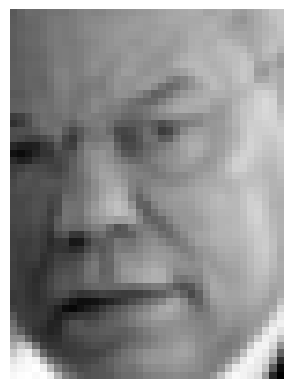

In [11]:
idx = 5
plt.imshow(X_test[idx].reshape(X_test.shape[1], X_test.shape[2]), cmap="gray")
plt.axis("off")
plt.show()

In [13]:
class_names = lfw_people.target_names[[0, 1]]

In [14]:
pred = model.predict(np.expand_dims(X_test[idx], axis=0))[0][0]
label_idx = 1 if pred > 0.5 else 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [15]:
print("Prediction:", class_names[label_idx], "| True:", class_names[y_test[idx]])

Prediction: Colin Powell | True: Colin Powell
